# Dask Tutorial

#### This is a tutorial about [Dask](https://dask.org/) python library, an open-source tool for Distributed-Data-Analysis.

In [3]:
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

stemmer = PorterStemmer()
%matplotlib inline

**Try to create a very big numpy array**
==================

In [2]:
import numpy as np

x = np.random.normal(10, 0.1 , size=(60000,60000))

MemoryError: 

**Create a LocalCluster in a single laptop and connect as a client**
-----------------------------------------------------------------------------

In [3]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=4 , threads_per_worker=1)
c = Client(cluster)
c

<Client: scheduler='tcp://127.0.0.1:55360' processes=4 cores=4>

### Collection: Dask.Array example

In [24]:
import dask.array as da

x = da.random.normal(10 , 0.1 , size=(60000,60000), chunks=(6000,6000))


dask.array<amax-aggregate, shape=(), dtype=float64, chunksize=()>

In [25]:
%time x.max().compute()

CPU times: user 13.9 s, sys: 2.01 s, total: 15.9 s
Wall time: 1min 15s


10.624283249226952

In [5]:
y = x.mean(axis=1)
y

dask.array<mean_agg-aggregate, shape=(60000,), dtype=float64, chunksize=(6000,)>

In [6]:
%time y.compute() #1min 24s

CPU times: user 15.6 s, sys: 2.18 s, total: 17.8 s
Wall time: 1min 21s


array([ 10.00065977,  10.00011302,   9.99911608, ...,   9.99962286,
        10.0003238 ,  10.00072895])

### Collection: dask.Data_Frame

In [7]:
import dask.dataframe as dd

# Load 2.5GB
df = dd.read_csv('/home/dead/Documents/SDDM/SDDM-project-master/item_dedup_sample.csv', blocksize=10e7) #100MB chunks
df

Dask DataFrame Structure:
                  asin helpful overall reviewText reviewTime reviewerID reviewerName summary unixReviewTime
npartitions=26                                                                                             
                object  object   int64     object     object     object       object  object        float64
                   ...     ...     ...        ...        ...        ...          ...     ...            ...
...                ...     ...     ...        ...        ...        ...          ...     ...            ...
                   ...     ...     ...        ...        ...        ...          ...     ...            ...
                   ...     ...     ...        ...        ...        ...          ...     ...            ...
Dask Name: from-delayed, 78 tasks

In [8]:
df.head(10)

asin   helpful  overall  \
0  0000000078    [1, 1]        5   
1  0000000116    [5, 5]        4   
2  0000000116    [0, 0]        1   
3  0000000868  [10, 10]        4   
4  0000013714    [0, 0]        4   
5  0000013714    [0, 0]        5   
6  0000013714    [0, 0]        5   
7  0000013714    [0, 0]        4   
8  0000013714    [0, 0]        4   
9  0000013714    [2, 3]        5   

                                          reviewText   reviewTime  \
0  Conversations with God Book 1 is the single mo...  08 11, 2004   
1  Interesting Grisham tale of a lawyer that take...  04 27, 2002   
2  The thumbnail is a shirt.  The product shown i...  03 24, 2014   
3  I'll be honest. I work for a large online reta...  09 11, 2002   
4  It had all the songs I wanted but I had ordere...  10 31, 2013   
5  We have many of the old, old issue. But the nu...  07 27, 2013   
6  I love this book. I love hymns and love to sin...   03 1, 2014   
7  We use this type of hymnal at church.  I was l...   12 3, 2013   
8  Heavenly Highway HymnsI ordered this hymnal be...  10 16, 2012   
9  I bought this for my husband who plays the pia...  09 13, 2009   

       reviewerID          reviewerName  \
0  A3AF8FFZAZYNE5                   NaN   
1   AH2L9G3DQHHAJ                 chris   
2  A2IIIDRK3PRRZY                Helene   
3  A1TADCM7YWPQ8M              Joel@AWS   
4   AWGH7V0BDOJKB      Barbara Marshall   
5  A3UTQPQPM4TQO0         betty burnett   
6   A8ZS0I5L5V31B  Ephraim O. Nwabuokei   
7   ACNGUPJ3A3TM9                   GCM   
8  A3BED5QFJWK88M                jimedd   
9  A2SUAM1J3GNN3B           J. McDonald   

                                             summary  unixReviewTime  
0                                         Impactful!    1.092182e+09  
1                                 Show me the money!    1.019866e+09  
2                          Listing is all screwed up    1.395619e+09  
3                              Not a Bad Translation    1.031702e+09  
4                                Not the large print    1.383178e+09  
5  I was disappointed that you would only allow m...    1.374883e+09  
6                                   GREAT HYMN BOOK!    1.393632e+09  
7                                        Nice Hymnal    1.386029e+09  
8                             Heavenly Highway Hymns    1.350346e+09  
9                             Heavenly Highway Hymns    1.252800e+09

In [9]:
ss = df.overall.std()
ss.visualize()

In [10]:
%time ss.compute() #17s 

CPU times: user 4.4 s, sys: 508 ms, total: 4.9 s
Wall time: 17.6 s


1.1533500379004651

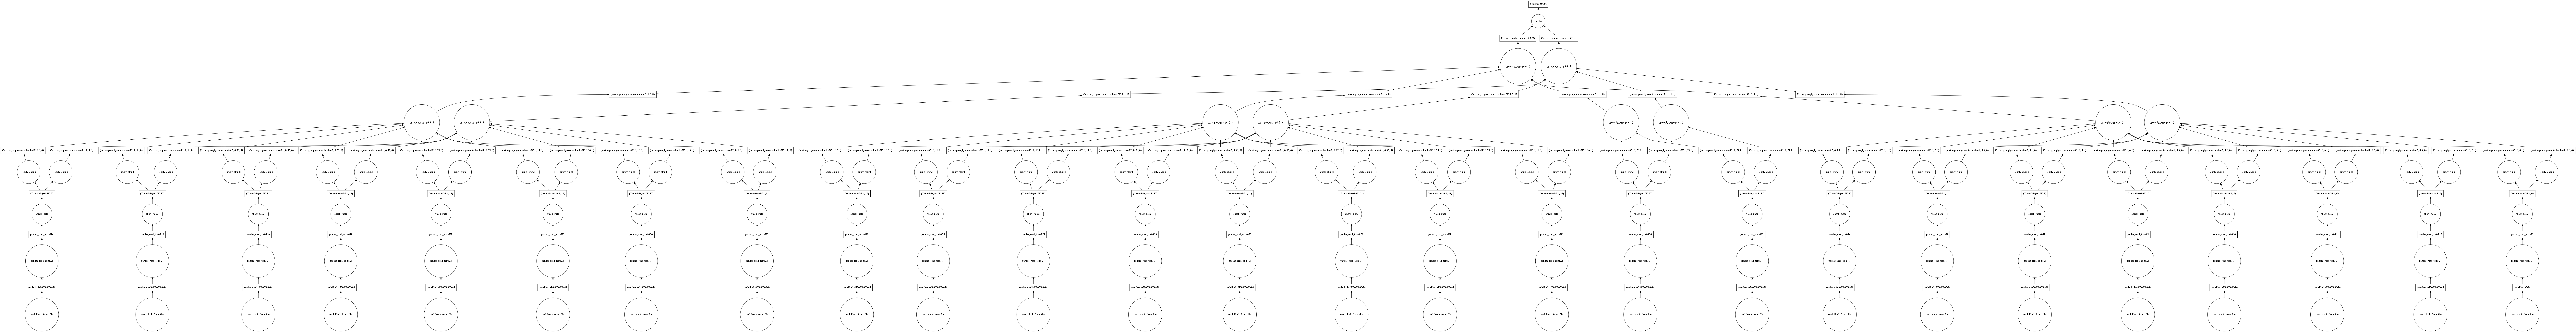

In [11]:
grp_avg = df.groupby(df.reviewerID).overall.mean()
grp_avg.visualize()

In [12]:
%time grp_avg.compute() #30secs

CPU times: user 7.46 s, sys: 1.23 s, total: 8.69 s
Wall time: 33.8 s


reviewerID
A00039763E5V43M02Z3YZ    4.000000
A00115723IFW2X9CUR3ST    5.000000
A00369122K166QHZJL54X    5.000000
A00652961QVJY2CGHFVP6    4.000000
A008483934S118DJU1U2C    5.000000
A00882592E5IMSN8FDQ0I    5.000000
A01003393RLOL33576QF5    5.000000
A01079131OLTHGTTBEQXH    5.000000
A010997525FU27TAPMJCG    5.000000
A011375310EMGKL9Z35WC    5.000000
A011769335YMOT60VKVFZ    5.000000
A01385023DOTO5WGDSKJB    4.000000
A014171233FOOGYHVBQMU    4.000000
A01429441OEFOCYXZMPX3    4.000000
A0181450OPL6IIRNAJ4R     3.666667
A0192904YO1UGFMZVKRI     4.000000
A019360429L78EWJJJRSR    5.000000
A01943261JU9TZ6VERT9M    4.000000
A01970793G3QUVPZFVDEE    5.000000
A02056171VJK6F4PB6JUF    1.000000
A0210941NIOOSU5F2WKN     5.000000
A02246551RWF9J9Z0O03W    5.000000
A02267853DOSJZ9X60E38    5.000000
A022858327OPV8WND7KHM    5.000000
A022899328A0QROR32DCT    3.000000
A02379831UFOXJO7PJP68    4.000000
A02404213TUCRF95O7PAU    5.000000
A026256610KF02G9TOXGA    4.000000
A02813501HRVQCCM81F8V    5.000000
A02

### Collection: dask.Bag 

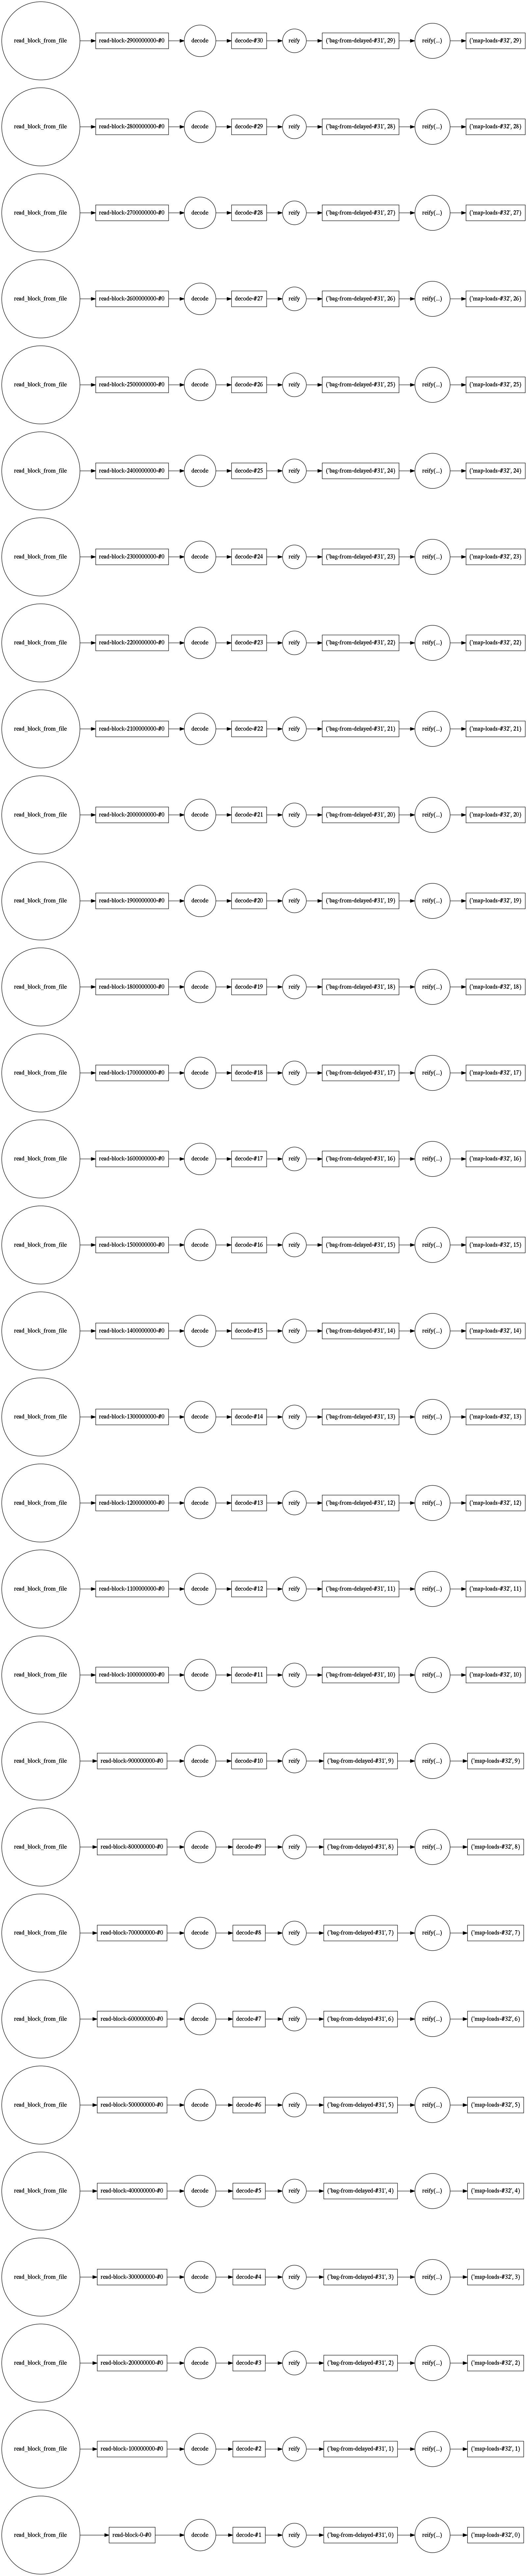

In [5]:
import dask.bag as db
import json

# Load 3GB
b = db.read_text('/home/dead/Documents/SDDM/SDDM-project-master/item_dedup_sample.json',blocksize=10e7).map(json.loads)
b.visualize(rankdir='LR')

In [14]:
b.take(2)

({'asin': '0000000078',
  'helpful': [1, 1],
  'overall': 5.0,
  'reviewText': 'Conversations with God Book 1 is the single most extraordinary book I have ever read!!!It totally changed my life. I would recommend it to anyone who is seeking emotional and spiritual growth, freedom and empowerment. This book did wonders for my relationship with God, myself and everyone around me. I approach living differently, I enjoy life more.  I have had a copy of this book since it was first published (1997)? and I still turn to it again and again for spiritual enlightenment, upliftment and remembering.I love this book and I love Neale Walsch for his courage in writing it. Unbelievable! A MUST READ!!!',
  'reviewTime': '08 11, 2004',
  'reviewerID': 'A3AF8FFZAZYNE5',
  'summary': 'Impactful!',
  'unixReviewTime': 1092182400},
 {'asin': '0000000116',
  'helpful': [5, 5],
  'overall': 4.0,
  'reviewText': "Interesting Grisham tale of a lawyer that takes millions of dollars from his firm after faking hi

In [15]:
b.pluck('reviewText').take(2)

('Conversations with God Book 1 is the single most extraordinary book I have ever read!!!It totally changed my life. I would recommend it to anyone who is seeking emotional and spiritual growth, freedom and empowerment. This book did wonders for my relationship with God, myself and everyone around me. I approach living differently, I enjoy life more.  I have had a copy of this book since it was first published (1997)? and I still turn to it again and again for spiritual enlightenment, upliftment and remembering.I love this book and I love Neale Walsch for his courage in writing it. Unbelievable! A MUST READ!!!',
 "Interesting Grisham tale of a lawyer that takes millions of dollars from his firm after faking his own death. Grisham usually is able to hook his readers early and ,in this case, doesn't play his hand to soon. The usually reliable Frank Mueller makes this story even an even better bet on Audiobook.")

In [16]:
%time b.pluck('asin').count().compute()

CPU times: user 4.43 s, sys: 856 ms, total: 5.28 s
Wall time: 24.4 s


3000001

In [17]:
%time b.pluck('asin').distinct().count().compute()

CPU times: user 5.02 s, sys: 704 ms, total: 5.72 s
Wall time: 25.9 s


195641

**Simple text-preprocess with bag**
---------------------------------------

In [6]:
# load 70MB
b = db.read_text('/home/dead/Documents/SDDM/SDDM-project-master/sample_data.json',blocksize=1.5e7).map(json.loads) #20MB chunk
b.npartitions

5

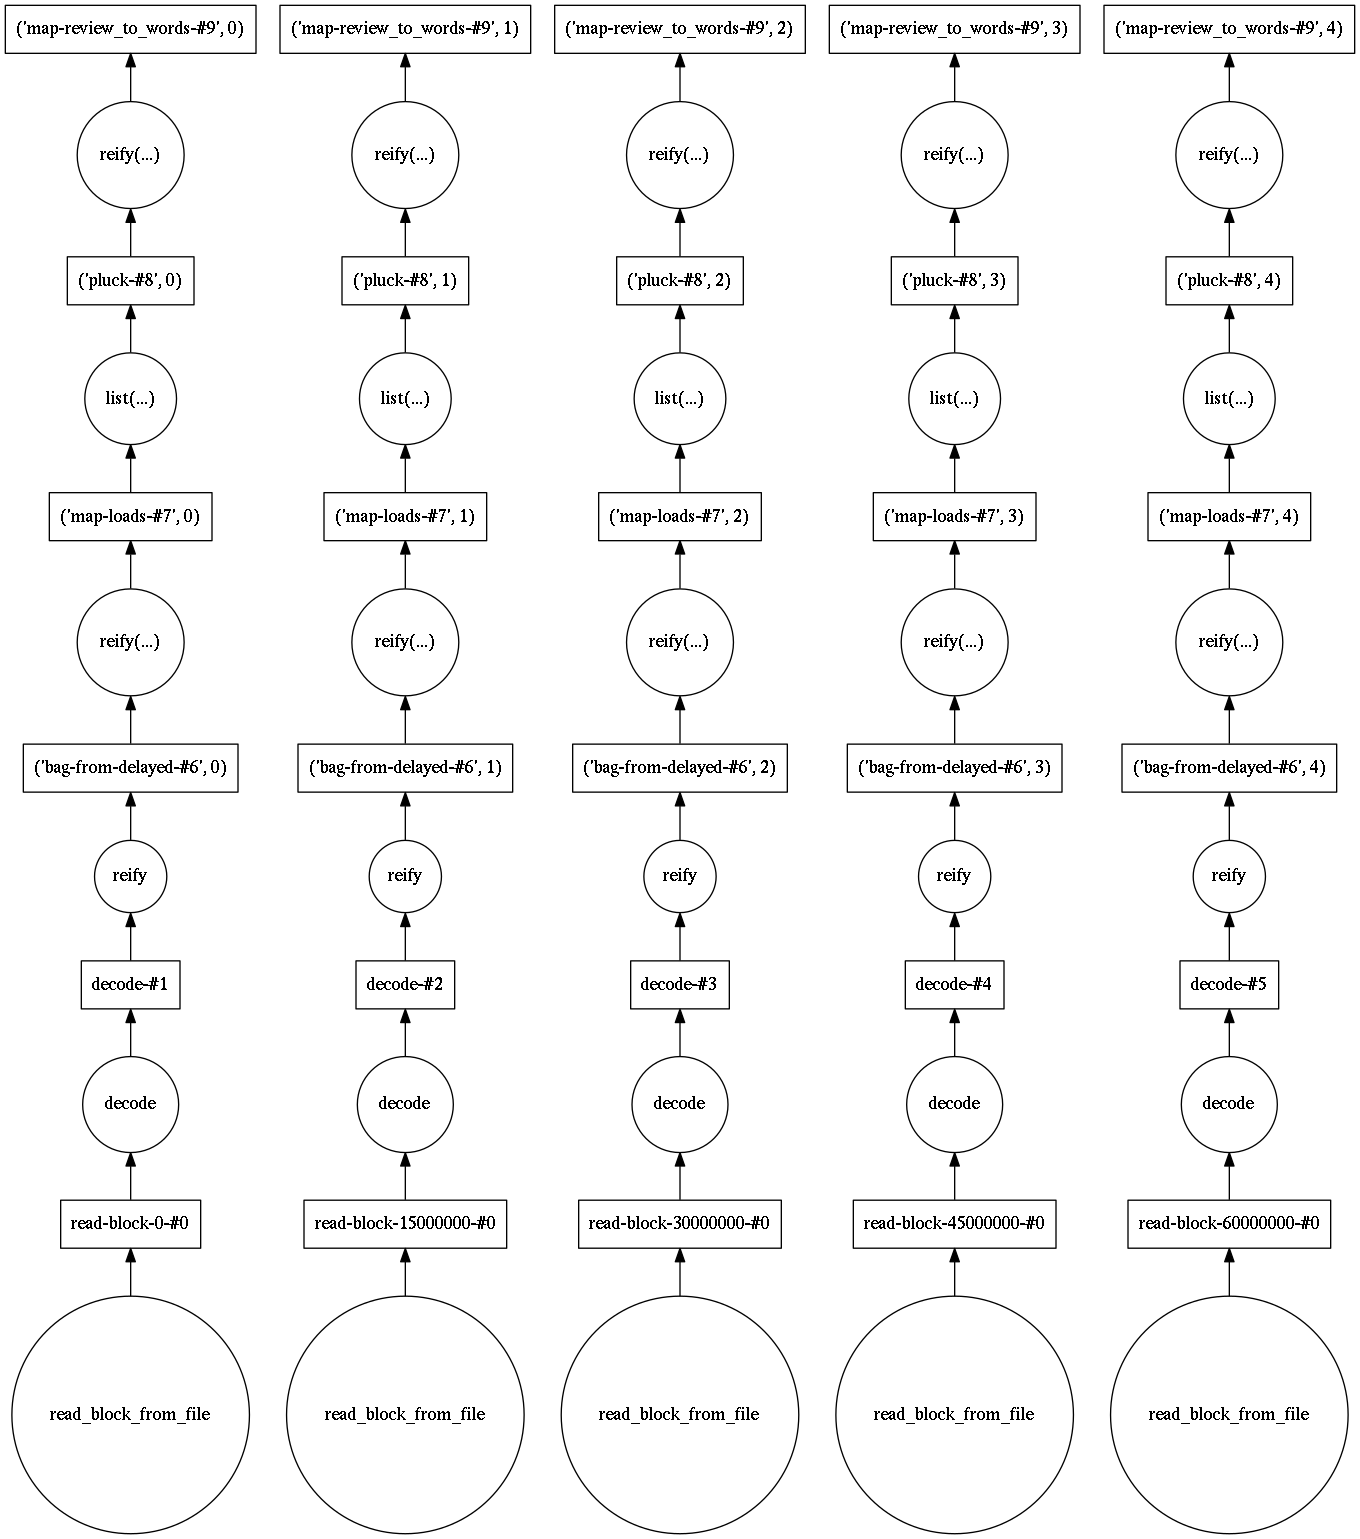

In [8]:
def review_to_words( raw_review ):
    #Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", str(raw_review).lower()) 
    
    #Tokenize
    words = nltk.word_tokenize(letters_only)                           
   
    stops = set(stopwords.words("english"))                  
     
    # 5. Remove stop words and stem the correct words
    meaningful_words = [stemmer.stem(w) for w in words if not w in stops]   
        
    return( " ".join( meaningful_words )) 


out = b.pluck('reviewText').map(review_to_words)
out.visualize()

In [ ]:
def review_to_words( raw_review ):

    #Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", str(raw_review).lower())
    
    #Tokenize
    words = nltk.word_tokenize(letters_only)                  
    
    # Remove Stop-words
    meaningful_words = [w for w in words if not w in stops]
    
    return( " ".join( meaningful_words ))


output = data.reviewText.map(review_to_words)


In [21]:
%time result = out.compute() #dask 1min 23s || 3min 2s

CPU times: user 18.2 s, sys: 1.38 s, total: 19.6 s
Wall time: 1min 48s


In [22]:
b.pluck('reviewText').take(2)

('Conversations with God Book 1 is the single most extraordinary book I have ever read!!!It totally changed my life. I would recommend it to anyone who is seeking emotional and spiritual growth, freedom and empowerment. This book did wonders for my relationship with God, myself and everyone around me. I approach living differently, I enjoy life more.  I have had a copy of this book since it was first published (1997)? and I still turn to it again and again for spiritual enlightenment, upliftment and remembering.I love this book and I love Neale Walsch for his courage in writing it. Unbelievable! A MUST READ!!!',
 "Interesting Grisham tale of a lawyer that takes millions of dollars from his firm after faking his own death. Grisham usually is able to hook his readers early and ,in this case, doesn't play his hand to soon. The usually reliable Frank Mueller makes this story even an even better bet on Audiobook.")

In [23]:
result

['convers god book singl extraordinari book ever read total chang life would recommend anyon seek emot spiritu growth freedom empower book wonder relationship god everyon around approach live differ enjoy life copi book sinc first publish still turn spiritu enlighten uplift rememb love book love neal walsch courag write unbeliev must read',
 'interest grisham tale lawyer take million dollar firm fake death grisham usual abl hook reader earli case play hand soon usual reliabl frank mueller make stori even even better bet audiobook',
 'thumbnail shirt product shown shoe descript book review confus',
 'honest work larg onlin retail name south american river order asin distinct frankli wonder hell quot reader turntabl quot particularli one editor illustr friend suggest titl realli result poor translat quot reader quot suppos quot tale quot quot turntabl quot suppos quot lyric quot realli book entitl quot korea favorit tale lyric quot oddli enough book appar edit mr hyun illustr mr park wel